In [3]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [4]:
%%bash
pip install cooler
pip install cooltools

  Using cached cooler-0.9.3-py3-none-any.whl.metadata (8.2 kB)
  Using cached asciitree-0.3.3.tar.gz (4.0 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached cytoolz-0.12.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.6 kB)
  Using cached h5py-3.11.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
  Using cached multiprocess-0.70.16-py310-none-any.whl.metadata (7.2 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.7/103.7 kB 6.0 MB/s eta 0:00:00
Using cached click-8.1.7-py3-none-any.whl (97 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 40.4 MB/s eta 0:00

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
%%bash
pip install bioframe

In [7]:
import bioframe as bioframe

In [8]:
import cooler

In [9]:
import cooltools
from cooltools import insulation
import cooltools.lib.plotting

In [10]:
import numpy as np

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
%%bash
pip install hicrep

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.6 MB/s eta 0:00:00
  Created wheel for hicrep: filename=hicrep-0.2.6-py3-none-any.whl size=34754 sha256=67b28a0ca04b006d7e66ead6d3f47b51dfd5a6afa32eb9f7beb614985e0337cc
  Stored in directory: /root/.cache/pip/wheels/21/75/06/6354db4851e5edd4899df43eded6240031885d7df3d5184d7a
Successfully built hicrep


In [13]:
import seaborn as sns
import pandas as pd
import hicrep as hicrep
from hicrep import hicrepSCC
from hicrep.utils import readMcool

In [14]:
mcool1 ='/content/drive/MyDrive/hic/HiC1.dm3.mapq_30.1000.mcool'
mcool2 ='/content/drive/MyDrive/hic/HiC2.dm3.mapq_30.1000.mcool'
mcool3 ='/content/drive/MyDrive/hic/HiC3.dm3.mapq_30.1000.mcool'
mcool4 ='/content/drive/MyDrive/hic/HiC4.dm3.mapq_30.1000.mcool'


In [15]:
resolution = 20000
clr1 = cooler.Cooler(f'{mcool1}::resolutions/{resolution}')
clr2 = cooler.Cooler(f'{mcool2}::resolutions/{resolution}')
clr3 = cooler.Cooler(f'{mcool3}::resolutions/{resolution}')
clr4 = cooler.Cooler(f'{mcool4}::resolutions/{resolution}')

Информация об объектах, можно заметить, что во всех файлах представлено 7 хромосом и 6024 bin'а, nnz - число ненулевых, а sum - общее число контактов

In [16]:
print(clr1.info)
print(clr2.info)
print(clr3.info)
print(clr4.info)

{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:39:00.281457', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024, 'nchroms': 7, 'nnz': 7122786, 'storage-mode': 'symmetric-upper', 'sum': 63912926}
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:16:47.610855', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024, 'nchroms': 7, 'nnz': 7386462, 'storage-mode': 'symmetric-upper', 'sum': 61819050}
{'bin-size': 20000, 'bin-type': 'fixed', 'creation-date': '2023-04-06T04:23:11.844138', 'format': 'HDF5::Cooler', 'format-url': 'https://github.com/open2c/cooler', 'format-version': 3, 'generated-by': 'cooler-0.8.11', 'genome-assembly': 'unknown', 'metadata': {}, 'nbins': 6024,

Открываем объекты как сбалансированные матрицы для хромосомы 2R для участка 4000000 - 5500000


In [17]:
start = 4000000
end = 5500000
region = ('chr2R', start, end)

In [18]:
m1 = clr1.matrix(balance = True).fetch(region)
m2 = clr2.matrix(balance = True).fetch(region)
m3 = clr3.matrix(balance = True).fetch(region)
m4 = clr4.matrix(balance = True).fetch(region)

In [19]:
print(m1, m2, m3, m4)

[[6.19093711e-01 9.30186114e-02 3.23277924e-02 ... 1.08818107e-03
  1.60662165e-03 9.84630252e-04]
 [9.30186114e-02 6.16845740e-01 9.60396612e-02 ... 1.15960906e-03
  1.22918562e-03 8.47480187e-04]
 [3.23277924e-02 9.60396612e-02 6.15568998e-01 ... 9.68102247e-04
  1.21276810e-03 7.76435110e-04]
 ...
 [1.08818107e-03 1.15960906e-03 9.68102247e-04 ... 7.90671590e-01
  1.15641784e-01 2.31404441e-02]
 [1.60662165e-03 1.22918562e-03 1.21276810e-03 ... 1.15641784e-01
  4.84282986e-01 9.89206390e-02]
 [9.84630252e-04 8.47480187e-04 7.76435110e-04 ... 2.31404441e-02
  9.89206390e-02 4.72842149e-01]] [[0.5070389  0.09140939 0.03244877 ... 0.00098271 0.00139449 0.00118942]
 [0.09140939 0.56898534 0.1026001  ... 0.00091567 0.00094498 0.00092116]
 [0.03244877 0.1026001  0.55404882 ... 0.00105762 0.00103901 0.00129416]
 ...
 [0.00098271 0.00091567 0.00105762 ... 0.64452965 0.13474614 0.02362695]
 [0.00139449 0.00094498 0.00103901 ... 0.13474614 0.43915665 0.10081841]
 [0.00118942 0.00092116 0.0012

Таблица с координатами контактов (сырая, это было обсуждено на лекции)

In [31]:
pix1=clr1.pixels(join = True).fetch(region)[:]
pix2=clr2.pixels(join = True).fetch(region)[:]
pix3=clr3.pixels(join = True).fetch(region)[:]
pix4=clr4.pixels(join = True).fetch(region)[:]
print(pix1,pix2, pix3, pix4)

        chrom1   start1     end1 chrom2    start2      end2  count
2571617  chr2R  4000000  4020000  chr2R   4000000   4020000   8308
2571618  chr2R  4000000  4020000  chr2R   4020000   4040000   1269
2571619  chr2R  4000000  4020000  chr2R   4040000   4060000    447
2571620  chr2R  4000000  4020000  chr2R   4060000   4080000    121
2571621  chr2R  4000000  4020000  chr2R   4080000   4100000     81
...        ...      ...      ...    ...       ...       ...    ...
2712424  chr2R  5480000  5500000   chrX  21880000  21900000      1
2712425  chr2R  5480000  5500000   chrX  22160000  22180000      1
2712426  chr2R  5480000  5500000   chrX  22220000  22240000      2
2712427  chr2R  5480000  5500000   chrX  22280000  22300000      1
2712428  chr2R  5480000  5500000   chrX  22380000  22400000      1

[140812 rows x 7 columns]         chrom1   start1     end1 chrom2    start2      end2  count
2698013  chr2R  4000000  4020000  chr2R   4000000   4020000   7296
2698014  chr2R  4000000  4020000  c

Таблицы бинов, в которой указаны

In [32]:
bins1=clr1.bins().fetch(region)[:]
bins2=clr2.bins().fetch(region)[:]
bins3=clr3.bins().fetch(region)[:]
bins4=clr4.bins().fetch(region)[:]
print(bins1, bins2, bins3, bins4)

      chrom    start      end    weight
1351  chr2R  4000000  4020000  0.008632
1352  chr2R  4020000  4040000  0.008491
1353  chr2R  4040000  4060000  0.008378
1354  chr2R  4060000  4080000  0.011925
1355  chr2R  4080000  4100000  0.012005
...     ...      ...      ...       ...
1421  chr2R  5400000  5420000  0.011241
1422  chr2R  5420000  5440000  0.007808
1423  chr2R  5440000  5460000  0.010505
1424  chr2R  5460000  5480000  0.006893
1425  chr2R  5480000  5500000  0.007129

[75 rows x 4 columns]       chrom    start      end    weight
1351  chr2R  4000000  4020000  0.008336
1352  chr2R  4020000  4040000  0.008474
1353  chr2R  4040000  4060000  0.008282
1354  chr2R  4060000  4080000  0.011998
1355  chr2R  4080000  4100000  0.012593
...     ...      ...      ...       ...
1421  chr2R  5400000  5420000  0.011289
1422  chr2R  5420000  5440000  0.007556
1423  chr2R  5440000  5460000  0.009823
1424  chr2R  5460000  5480000  0.006970
1425  chr2R  5480000  5500000  0.006794

[75 rows x 4 col

In [ ]:
!cooler dump -h

Usage: cooler dump [OPTIONS] COOL_PATH

  Dump a cooler's data to a text stream.

  COOL_PATH : Path to COOL file or cooler URI.

Options:
  -t, --table [chroms|bins|pixels]
                                  Which table to dump. Choosing 'chroms' or
                                  'bins' will cause all pixel-related options
                                  to be ignored. Note that for coolers stored
                                  in symmetric-upper mode, 'pixels' only holds
                                  the upper triangle values of the matrix.
                                  [default: pixels]
  -c, --columns SEPARATED[,]      Restrict output to a subset of columns,
                                  provided as a comma-separated list.
  -H, --header                    Print the header of column names as the
                                  first row.
  --na-rep TEXT                   Missing data representation. Default is
                                  empty ''.
  --flo

Тут присутвуют столбцы с координатами двух bin'ов, хромосомы начало и конец bin'a, count - число контактов и balanced - веса балансировки

Теперь получим сбалансированные таблицы

In [67]:
!cooler dump -t pixels -H -r chr2R:4,000,000-5,500,000 -r2 chr2R:4,000,000-5,500,000 -b --balanced --join /content/drive/MyDrive/hic/HiC1.dm3.mapq_30.1000.mcool::resolutions/20000

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr2R	4000000	4020000	chr2R	4000000	4020000	8308	0.619094
chr2R	4000000	4020000	chr2R	4020000	4040000	1269	0.0930186
chr2R	4000000	4020000	chr2R	4040000	4060000	447	0.0323278
chr2R	4000000	4020000	chr2R	4060000	4080000	121	0.012456
chr2R	4000000	4020000	chr2R	4080000	4100000	81	0.00839402
chr2R	4000000	4020000	chr2R	4100000	4120000	143	0.00821591
chr2R	4000000	4020000	chr2R	4120000	4140000	76	0.00537398
chr2R	4000000	4020000	chr2R	4140000	4160000	42	0.00345373
chr2R	4000000	4020000	chr2R	4160000	4180000	36	0.00401442
chr2R	4000000	4020000	chr2R	4180000	4200000	17	0.00278238
chr2R	4000000	4020000	chr2R	4200000	4220000	22	0.00190173
chr2R	4000000	4020000	chr2R	4220000	4240000	25	0.00314984
chr2R	4000000	4020000	chr2R	4240000	4260000	53	0.00341847
chr2R	4000000	4020000	chr2R	4260000	4280000	12	0.00134059
chr2R	4000000	4020000	chr2R	4280000	4300000	24	0.00348839
chr2R	4000000	4020000	chr2R	4300000	4320000	31	0.00366965
chr2R	4000000	4020

In [68]:
!cooler dump -t pixels -H -r chr2R:4,000,000-5,500,000 -r2 chr2R:4,000,000-5,500,000 -b --balanced --join /content/drive/MyDrive/hic/HiC2.dm3.mapq_30.1000.mcool::resolutions/20000

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr2R	4000000	4020000	chr2R	4000000	4020000	7296	0.507039
chr2R	4000000	4020000	chr2R	4020000	4040000	1294	0.0914094
chr2R	4000000	4020000	chr2R	4040000	4060000	470	0.0324488
chr2R	4000000	4020000	chr2R	4060000	4080000	134	0.0134023
chr2R	4000000	4020000	chr2R	4080000	4100000	87	0.00913324
chr2R	4000000	4020000	chr2R	4100000	4120000	149	0.00773994
chr2R	4000000	4020000	chr2R	4120000	4140000	83	0.00545822
chr2R	4000000	4020000	chr2R	4140000	4160000	49	0.00383679
chr2R	4000000	4020000	chr2R	4160000	4180000	26	0.00286778
chr2R	4000000	4020000	chr2R	4180000	4200000	21	0.00350997
chr2R	4000000	4020000	chr2R	4200000	4220000	31	0.00262711
chr2R	4000000	4020000	chr2R	4220000	4240000	25	0.00304355
chr2R	4000000	4020000	chr2R	4240000	4260000	32	0.00198984
chr2R	4000000	4020000	chr2R	4260000	4280000	25	0.00274686
chr2R	4000000	4020000	chr2R	4280000	4300000	27	0.00395756
chr2R	4000000	4020000	chr2R	4300000	4320000	29	0.00340508
chr2R	4000000	402

In [69]:
!cooler dump -t pixels -H -r chr2R:4,000,000-5,500,000 -r2 chr2R:4,000,000-5,500,000 -b --balanced --join /content/drive/MyDrive/hic/HiC3.dm3.mapq_30.1000.mcool::resolutions/20000

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr2R	4000000	4020000	chr2R	4000000	4020000	6817	0.580439
chr2R	4000000	4020000	chr2R	4020000	4040000	1504	0.15018
chr2R	4000000	4020000	chr2R	4040000	4060000	709	0.0620548
chr2R	4000000	4020000	chr2R	4060000	4080000	137	0.019595
chr2R	4000000	4020000	chr2R	4080000	4100000	113	0.0129896
chr2R	4000000	4020000	chr2R	4100000	4120000	239	0.0141491
chr2R	4000000	4020000	chr2R	4120000	4140000	104	0.00875353
chr2R	4000000	4020000	chr2R	4140000	4160000	61	0.00416695
chr2R	4000000	4020000	chr2R	4160000	4180000	33	0.00367557
chr2R	4000000	4020000	chr2R	4180000	4200000	19	0.00288505
chr2R	4000000	4020000	chr2R	4200000	4220000	42	0.00359057
chr2R	4000000	4020000	chr2R	4220000	4240000	17	0.00214258
chr2R	4000000	4020000	chr2R	4240000	4260000	40	0.00231619
chr2R	4000000	4020000	chr2R	4260000	4280000	36	0.00356712
chr2R	4000000	4020000	chr2R	4280000	4300000	33	0.004482
chr2R	4000000	4020000	chr2R	4300000	4320000	32	0.00387583
chr2R	4000000	4020000	

In [70]:
!cooler dump -t pixels -H -r chr2R:4,000,000-5,500,000 -r2 chr2R:4,000,000-5,500,000 -b --balanced --join /content/drive/MyDrive/hic/HiC4.dm3.mapq_30.1000.mcool::resolutions/20000

chrom1	start1	end1	chrom2	start2	end2	count	balanced
chr2R	4000000	4020000	chr2R	4000000	4020000	6434	0.489074
chr2R	4000000	4020000	chr2R	4020000	4040000	1787	0.154198
chr2R	4000000	4020000	chr2R	4040000	4060000	826	0.0623819
chr2R	4000000	4020000	chr2R	4060000	4080000	190	0.0208788
chr2R	4000000	4020000	chr2R	4080000	4100000	150	0.0136504
chr2R	4000000	4020000	chr2R	4100000	4120000	278	0.0160225
chr2R	4000000	4020000	chr2R	4120000	4140000	147	0.0103547
chr2R	4000000	4020000	chr2R	4140000	4160000	63	0.00374201
chr2R	4000000	4020000	chr2R	4160000	4180000	55	0.0045872
chr2R	4000000	4020000	chr2R	4180000	4200000	28	0.00314985
chr2R	4000000	4020000	chr2R	4200000	4220000	64	0.00435812
chr2R	4000000	4020000	chr2R	4220000	4240000	35	0.00341313
chr2R	4000000	4020000	chr2R	4240000	4260000	55	0.00283049
chr2R	4000000	4020000	chr2R	4260000	4280000	37	0.00297611
chr2R	4000000	4020000	chr2R	4280000	4300000	43	0.00444754
chr2R	4000000	4020000	chr2R	4300000	4320000	62	0.00550094
chr2R	4000000	402000

Графики частоты контактов в зависимости от расстояния

In [42]:
z1=np.zeros(len(m1))
z2=np.zeros(len(m2))
z3=np.zeros(len(m3))
z4=np.zeros(len(m4))
for i in range(len(m1)):
  z1[i]=np.nanmean(np.diagonal(m1,i))
  z2[i]=np.nanmean(np.diagonal(m2,i))
  z3[i]=np.nanmean(np.diagonal(m3,i))
  z4[i]=np.nanmean(np.diagonal(m4,i))

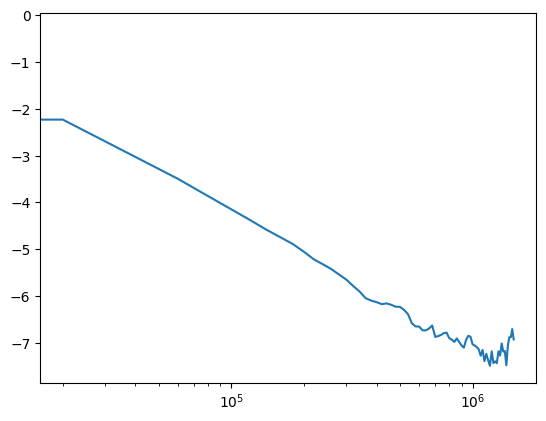

In [43]:
plt.plot(np.arange(len(m1))*20000,np.log(z1))
plt.xscale('log')

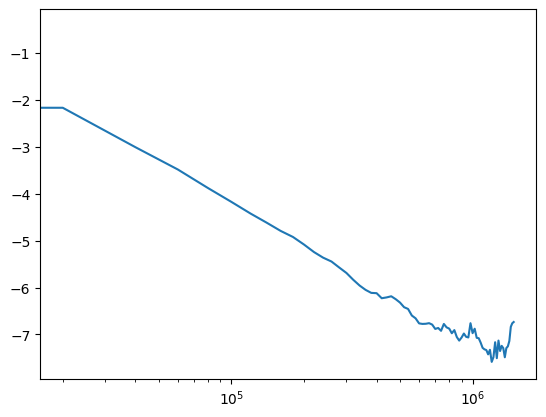

In [44]:
plt.plot(np.arange(len(m2))*20000,np.log(z2))
plt.xscale('log')

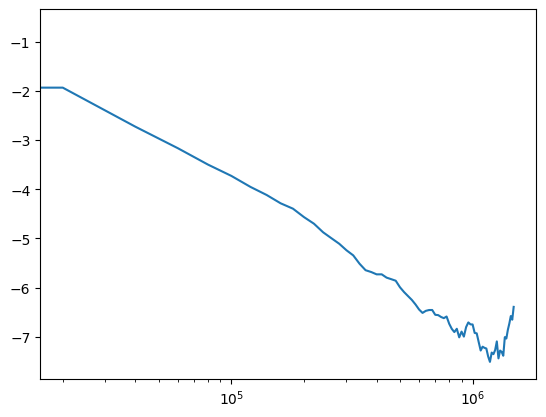

In [45]:
plt.plot(np.arange(len(m3))*20000,np.log(z3))
plt.xscale('log')

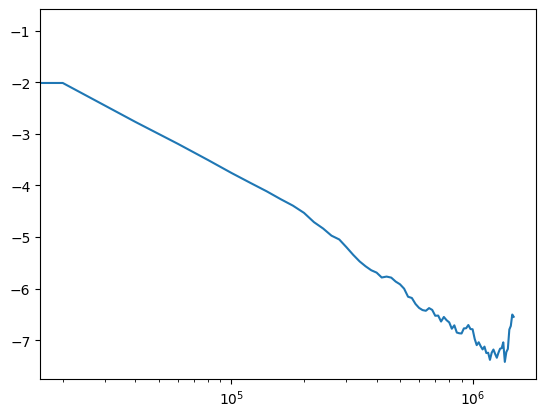

In [46]:
plt.plot(np.arange(len(m4))*20000,np.log(z4))
plt.xscale('log')

In [47]:
windows = [2*resolution]
insulation_table1 = insulation(clr1, windows, verbose=True)
insulation_table2 = insulation(clr2, windows, verbose=True)
insulation_table3 = insulation(clr3, windows, verbose=True)
insulation_table4 = insulation(clr4, windows, verbose=True)
print(insulation_table1, insulation_table2, insulation_table3, insulation_table4)

INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Processing region chr3R
INFO:root:Processing region chr4
INFO:root:Processing region chrX
INFO:root:Processing region chrM
INFO:root:fallback to serial implementation.
INFO:root:Processing region chr2L
INFO:root:Processing region chr2R
INFO:root:Processing region chr3L
INFO:root:Pro

      chrom     start       end region  is_bad_bin  \
0     chr2L         0     20000  chr2L       False   
1     chr2L     20000     40000  chr2L       False   
2     chr2L     40000     60000  chr2L       False   
3     chr2L     60000     80000  chr2L       False   
4     chr2L     80000    100000  chr2L       False   
...     ...       ...       ...    ...         ...   
6019   chrX  22360000  22380000   chrX       False   
6020   chrX  22380000  22400000   chrX       False   
6021   chrX  22400000  22420000   chrX       False   
6022   chrX  22420000  22422827   chrX        True   
6023   chrM         0     19517   chrM       False   

      log2_insulation_score_40000  n_valid_pixels_40000  \
0                             NaN                   0.0   
1                        0.069344                   1.0   
2                        0.479690                   1.0   
3                       -0.511156                   1.0   
4                       -0.153316                   1.0 

In [48]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)

(4000000.0, 5500000.0)

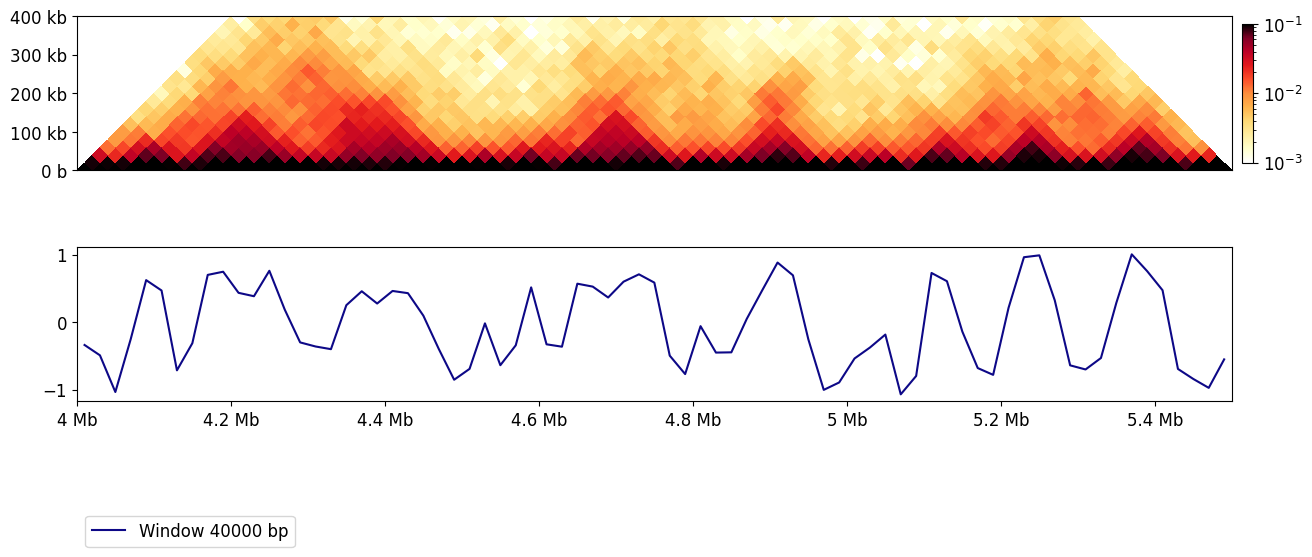

In [49]:
plt.rcParams['font.size'] = 12

start = 4000000
end = 5500000
region = ('chr2R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr1.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table1, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(4000000.0, 5500000.0)

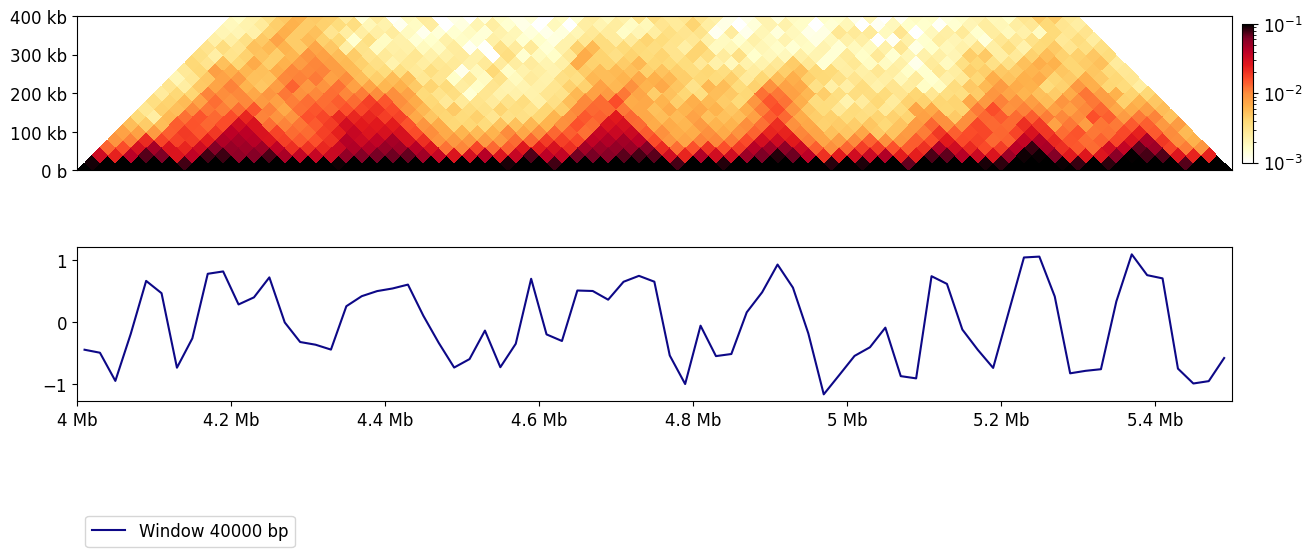

In [50]:
plt.rcParams['font.size'] = 12

start = 4000000
end = 5500000
region = ('chr2R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr2.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table2, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(4000000.0, 5500000.0)

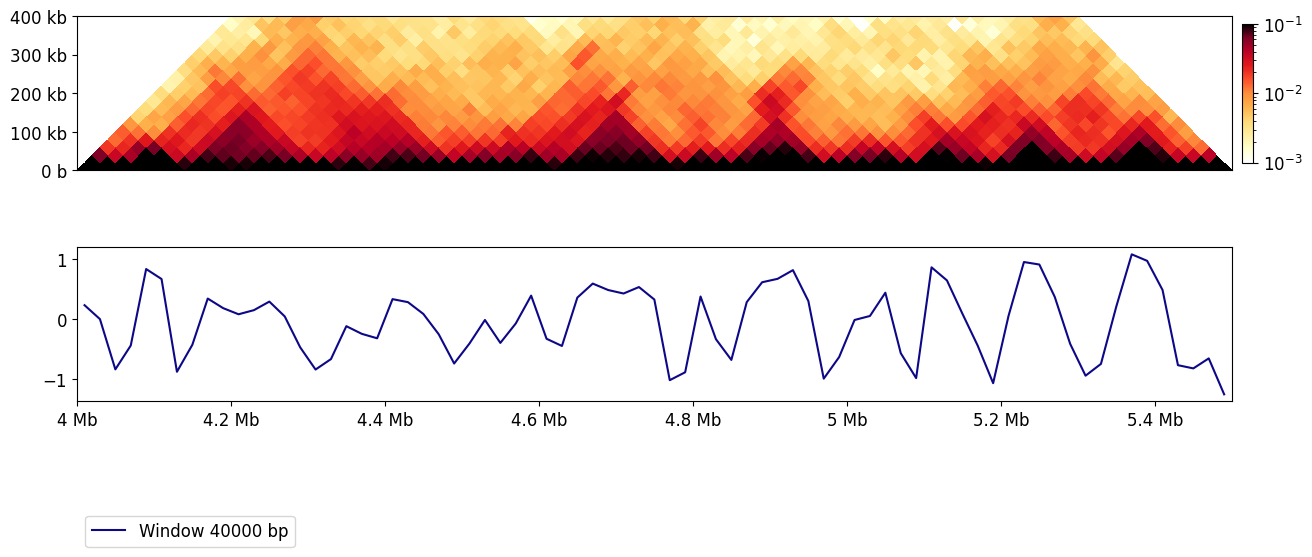

In [51]:
plt.rcParams['font.size'] = 12

start = 4000000
end = 5500000
region = ('chr2R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr3.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table3, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(4000000.0, 5500000.0)

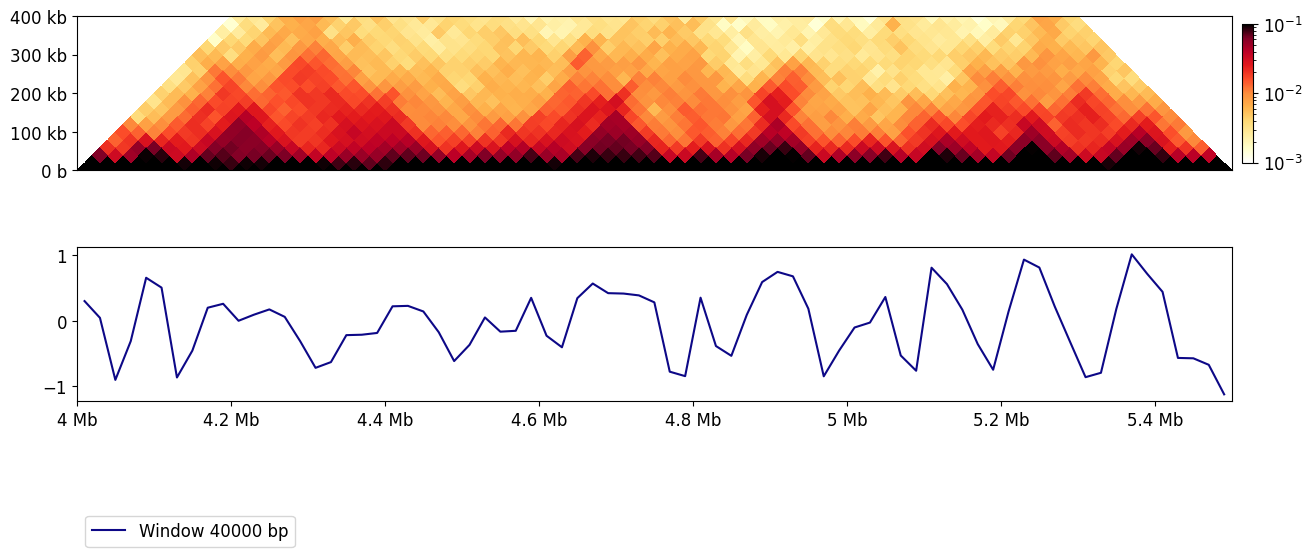

In [52]:
plt.rcParams['font.size'] = 12

start = 4000000
end = 5500000
region = ('chr2R', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr4.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table4, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(4000000.0, 5500000.0)

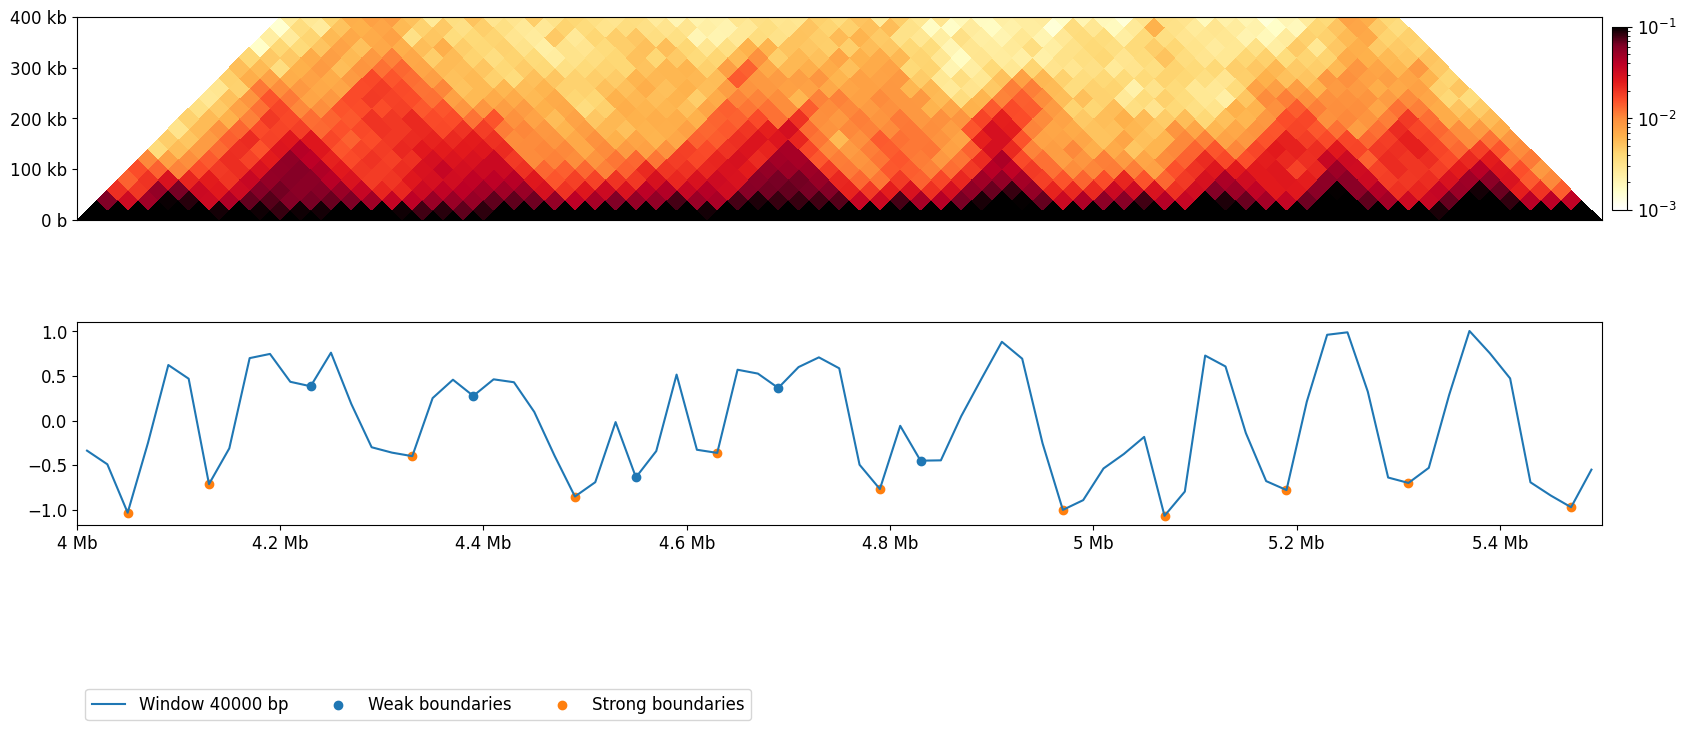

In [53]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table1, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries1 = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries1 = boundaries1[~boundaries1[f'is_boundary_{windows[0]}']]
strong_boundaries1 = boundaries1[boundaries1[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries1[['start', 'end']].mean(axis=1),
            weak_boundaries1[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries1[['start', 'end']].mean(axis=1),
            strong_boundaries1[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(4000000.0, 5500000.0)

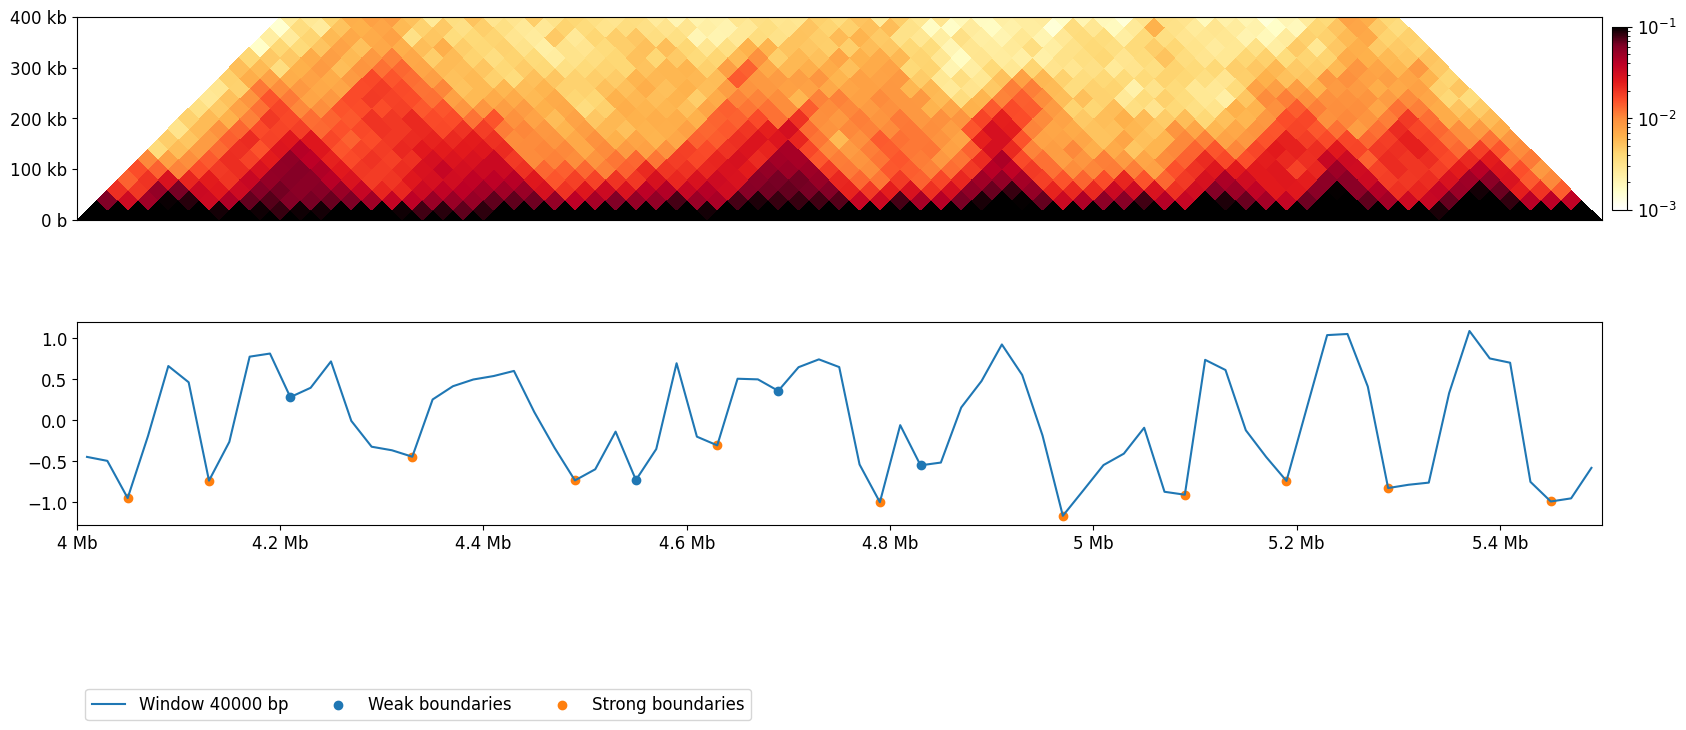

In [54]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table2, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries2 = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries2 = boundaries2[~boundaries2[f'is_boundary_{windows[0]}']]
strong_boundaries2 = boundaries2[boundaries2[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries2[['start', 'end']].mean(axis=1),
            weak_boundaries2[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries2[['start', 'end']].mean(axis=1),
            strong_boundaries2[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(4000000.0, 5500000.0)

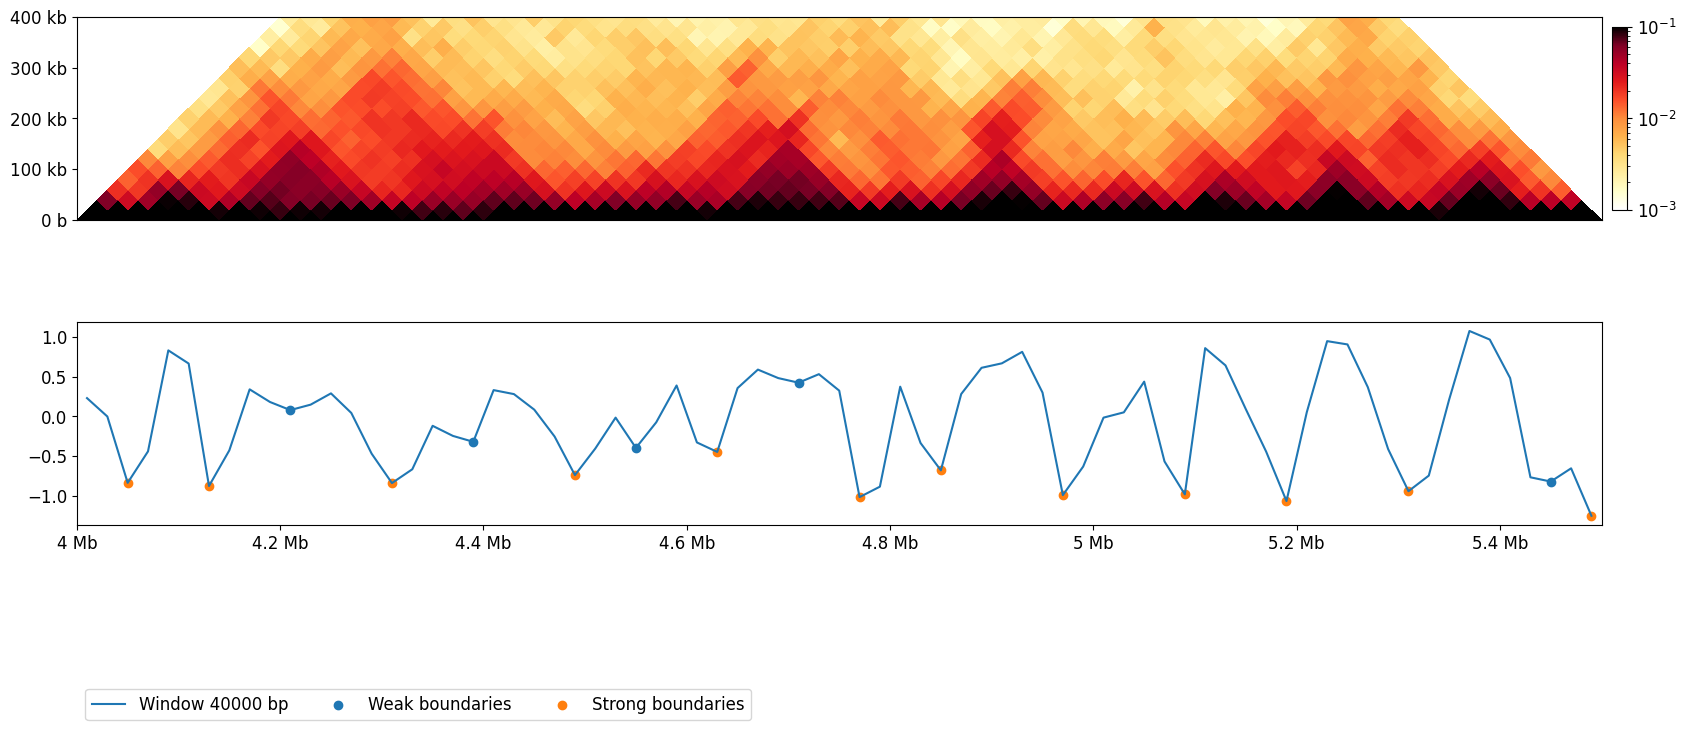

In [55]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table3, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries3 = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries3 = boundaries3[~boundaries3[f'is_boundary_{windows[0]}']]
strong_boundaries3 = boundaries3[boundaries3[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries3[['start', 'end']].mean(axis=1),
            weak_boundaries3[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries3[['start', 'end']].mean(axis=1),
            strong_boundaries3[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

(4000000.0, 5500000.0)

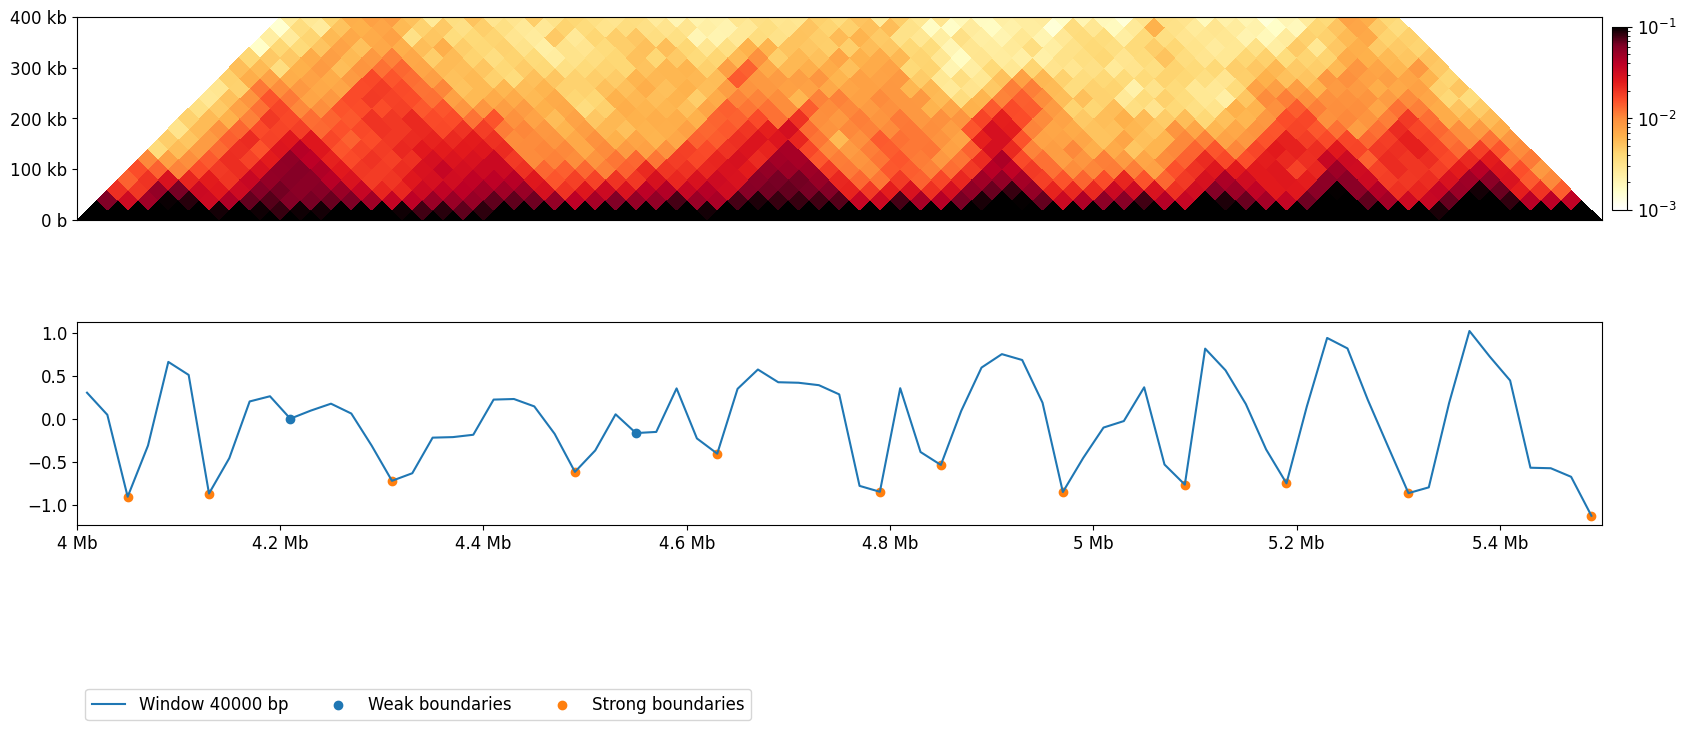

In [56]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table4, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries4 = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries4 = boundaries4[~boundaries4[f'is_boundary_{windows[0]}']]
strong_boundaries4 = boundaries4[boundaries4[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries4[['start', 'end']].mean(axis=1),
            weak_boundaries4[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries4[['start', 'end']].mean(axis=1),
            strong_boundaries4[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

In [57]:
bound1 = boundaries1.rename(columns={'boundary_strength_40000' : 'score'})
bound2 = boundaries2.rename(columns={'boundary_strength_40000' : 'score'})
bound3 = boundaries3.rename(columns={'boundary_strength_40000' : 'score'})
bound4 = boundaries4.rename(columns={'boundary_strength_40000' : 'score'})

In [58]:
bound1 = bound1.drop(['region', 'is_bad_bin',	'log2_insulation_score_40000',	'n_valid_pixels_40000', 'is_boundary_40000'], axis = 1)
bound2 = bound2.drop(['region', 'is_bad_bin',	'log2_insulation_score_40000',	'n_valid_pixels_40000', 'is_boundary_40000'], axis = 1)
bound3 = bound3.drop(['region', 'is_bad_bin',	'log2_insulation_score_40000',	'n_valid_pixels_40000', 'is_boundary_40000'], axis = 1)
bound4 = bound4.drop(['region', 'is_bad_bin',	'log2_insulation_score_40000',	'n_valid_pixels_40000', 'is_boundary_40000'], axis = 1)

In [59]:
bound1 = bound1.rename(columns={'chrom' : 'Chromosome', 'start' : 'Start', 'end' : 'End'})
bound2 = bound2.rename(columns={'chrom' : 'Chromosome', 'start' : 'Start', 'end' : 'End'})
bound3 = bound3.rename(columns={'chrom' : 'Chromosome', 'start' : 'Start', 'end' : 'End'})
bound4 = bound4.rename(columns={'chrom' : 'Chromosome', 'start' : 'Start', 'end' : 'End'})

In [60]:
%%bash
pip install fuc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.0/156.0 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 52.0 MB/s eta 0:00:00


In [61]:
from fuc import pybed

In [77]:
bf1 = pybed.BedFrame.from_frame(meta = ['Chromosome', 'Start', 'End', 'Score'], data=bound1)
bf2 = pybed.BedFrame.from_frame(meta = ['Chromosome', 'Start', 'End', 'Score'], data=bound2)
bf3 = pybed.BedFrame.from_frame(meta = ['Chromosome', 'Start', 'End', 'Score'], data=bound3)
bf4 = pybed.BedFrame.from_frame(meta = ['Chromosome', 'Start', 'End', 'Score'], data=bound4)

In [78]:
bf1.to_file('tads1.bed')
bf2.to_file('tads2.bed')
bf3.to_file('tads3.bed')
bf4.to_file('tads4.bed')

In [79]:
!head tads1.bed

Chromosome
Start
End
Score
chr2R	4040000	4060000	1.9191191246802757
chr2R	4120000	4140000	1.3372107725648574
chr2R	4220000	4240000	0.3632300627481481
chr2R	4320000	4340000	0.862884915751038
chr2R	4380000	4400000	0.18182418489758867
chr2R	4480000	4500000	1.6152937844515116


Получилось странно, пофикшу это в текстовом редакторе